In [ ]:
# I've had the same problem. But it works after I follow this steps:
# step1:Access Anaconda Prompt for the environment that you are working with as admin: conda remove --force fbprophet
# step2:in your jupyter notebook use pip install fbprophet

!pip install fbprophet

In [1]:
# %load_ext rpy2.ipython
%matplotlib inline
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Importing dependencies
import pandas as pd
from fbprophet import Prophet
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from datetime import datetime
pd.options.display.float_format = '{:,.2f}'.format 


In [7]:
#Define the time-series evaluation funtion

def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print ('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}', end = '\n\n')
    
    
#(MSE) measures the average of the squares of the errors, that is, the average squared difference 
# between the estimated values and the actual value

#(MAE) is a measure of errors between paired observations expressing the same phenomenon. 
# Examples of Y versus X include comparisons of predicted versus observed,

# (RMSE) is a frequently used measure of the differences between values (sample or population values) 
# predicted by a model or an estimator and the values observed. The RMSD represents the square root of 
# the second sample moment of the differences between predicted values and observed values or the quadratic mean 
# of these differences. These deviations are called residuals when the calculations are performed over the data 
# sample that was used for estimation and are called errors (or prediction errors) when computed out-of-sample. 
# The RMSD serves to aggregate the magnitudes of the errors in predictions for various data points into a single
# measure of predictive power. RMSD is a measure of accuracy, to compare forecasting errors of different models 
# for a particular dataset and not between datasets, as it is scale-dependent.

#(MAPE) is a measure of prediction accuracy of a forecasting method in statistics, for example in trend estimation, 
# also used as a loss function for regression problems in machine learning. It usually expresses the accuracy as a ratio


In [8]:
# reading data
dfRead = pd.read_csv('data_clean_transposed.csv', parse_dates=["Unnamed: 0"])
dfRead.head()

,Unnamed: 0,040002_100000000000,040002_110000000000,040002_110100000000,040002_110200000000,040002_110300000000,040002_110405000000,040002_115000000000,040002_120000000000,040002_120100000000,...,99_650000000000,99_660000000000,99_670200000000,99_670200000008,99_670300000000,99_670400000000,99_670500000000,99_670600000000,99_671100000000,99_800000000000
0,2000-12-01 00:00:00,"404,155.54","25,111.10","7,748.40","16,499.94",344.42,0.00,0.00,"134,558.61",0.00,...,0.56,42.78,230.19,291.60,344.21,174.30,177.40,129.91,133.38,"11,147.30"
1,2001-01-01 00:00:00,"394,339.14","24,510.99","4,300.86","19,677.00",272.07,0.00,0.00,"129,571.26",0.00,...,0.00,5.79,26.54,34.12,38.17,22.12,22.29,16.50,17.21,"11,594.98"
2,2001-02-01 00:00:00,"398,165.97","22,223.13","4,400.05","17,297.77",267.61,0.00,0.00,"132,847.61",0.00,...,0.28,10.35,49.89,58.83,70.56,39.13,43.98,33.63,35.42,"11,141.10"
3,2001-03-01 00:00:00,"396,748.81","25,016.22","4,121.61","20,293.77",278.62,0.00,0.00,"124,203.01",0.00,...,0.49,18.01,81.91,91.43,107.11,57.71,63.09,41.31,47.25,"11,146.97"
4,2001-04-01 00:00:00,"394,034.68","22,234.32","4,484.62","17,269.42",298.01,0.00,0.00,"125,010.40",0.00,...,0.50,23.35,111.74,126.35,149.99,83.74,88.72,61.56,71.47,"11,611.95"


In [9]:
dfRead.dtypes

Unnamed: 0              object
040002_100000000000    float64
040002_110000000000    float64
040002_110100000000    float64
040002_110200000000    float64
                        ...   
99_670400000000        float64
99_670500000000        float64
99_670600000000        float64
99_671100000000        float64
99_800000000000        float64
Length: 29697, dtype: object

In [29]:
df = dfRead[['Unnamed: 0', '040002_100000000000']]

In [32]:
df = df.iloc[:-1,:]

In [33]:
df

,Unnamed: 0,040002_100000000000
0,2000-12-01 00:00:00,"404,155.54"
1,2001-01-01 00:00:00,"394,339.14"
2,2001-02-01 00:00:00,"398,165.97"
3,2001-03-01 00:00:00,"396,748.81"
4,2001-04-01 00:00:00,"394,034.68"
...,...,...
237,2020-09-01 00:00:00,"1,375,992.09"
238,2020-10-01 00:00:00,"1,358,074.51"
239,2020-11-01 00:00:00,"1,329,904.76"
240,2020-12-01 00:00:00,"1,356,419.16"


In [34]:
df.shape

(242, 2)

In [35]:
df.rename(columns = {'Unnamed: 0':'ds', '040002_100000000000':'y'}, inplace = True) 
df.head()

,ds,y
0,2000-12-01 00:00:00,"404,155.54"
1,2001-01-01 00:00:00,"394,339.14"
2,2001-02-01 00:00:00,"398,165.97"
3,2001-03-01 00:00:00,"396,748.81"
4,2001-04-01 00:00:00,"394,034.68"


In [36]:
df.dtypes

ds     object
y     float64
dtype: object

In [37]:
# Convertring ds to datetime
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d', errors='coerce')


In [38]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [39]:
df

,ds,y
0,2000-12-01,"404,155.54"
1,2001-01-01,"394,339.14"
2,2001-02-01,"398,165.97"
3,2001-03-01,"396,748.81"
4,2001-04-01,"394,034.68"
...,...,...
237,2020-09-01,"1,375,992.09"
238,2020-10-01,"1,358,074.51"
239,2020-11-01,"1,329,904.76"
240,2020-12-01,"1,356,419.16"


In [ ]:
# instantiating a new Prophet object

#Any settings to the forecasting procedure are passed into the constructor.
#Then you call its fit method and pass in the historical dataframe. 
#Fitting should take 1-5 seconds

# m = Prophet(yearly_seasonality=True, daily_seasonality=True)

# You can use Prophet to fit monthly data. However, the underlying model is continuous-time, 
# which means that you can get strange results if you fit the model to monthly data and then ask for daily forecasts

# m = Prophet(seasonality_mode='multiplicative').fit(df)
# future = m.make_future_dataframe(periods=3652)
# fcst = m.predict(future)
# fig = m.plot(fcst)

# This is the same issue from above where the dataset has regular gaps
# When we fit the yearly seasonality, it only has data for the first of each month and the seasonality 
# components for the remaining days are unidentifiable and overfit. 
#This can be clearly seen by doing MCMC to see uncertainty in the seasonality:

m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(df)
fcst = m.predict(future)
fig = m.plot_components(fcst)

# The seasonality has low uncertainty at the start of each month where there are data points,
# but has very high posterior variance in between.

# When fitting Prophet to monthly data, only make monthly forecasts, 
# which can be done by passing the frequency into make_future_dataframe:

future = m.make_future_dataframe(periods=120, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)

#In Python, the frequency can be anything from the pandas list of frequency strings here: 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
# Note that MS used here is month-start, meaning the data point is placed on the start of each month.
#In monthly data, yearly seasonality can also be modeled with binary extra regressors.
#In particular, the model can use 12 extra regressors like is_jan, is_feb, etc. 
# where is_jan is 1 if the date is in Jan and 0 otherwise. 
#This approach would avoid the within-month unidentifiability seen above. 
# Be sure to use yearly_seasonality=False if monthly extra regressors are being added.




In [40]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300)

In [41]:
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Training & Evaluating the model

In [57]:
#Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made

# In this code we use 0 periods to create predictions for the historical timeline 

train_future = m.make_future_dataframe(periods=0, freq='MS')
train_future.tail()

,ds
237,2020-09-01
238,2020-10-01
239,2020-11-01
240,2020-12-01
241,2021-01-01


In [58]:
#The predict method will assign each row in future a predicted value which it names yhat.

#The forecast object here is a new dataframe that includes a column yhat with the forecast, 
# as well as columns for components and uncertainty intervals.

#In these case the result is the predicted values for the historical dates

forecast_train = m.predict(train_future)
forecast_train[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
237,2020-09-01,"1,380,954.67","1,303,248.79","1,461,551.36"
238,2020-10-01,"1,332,397.93","1,251,964.28","1,410,467.81"
239,2020-11-01,"1,344,985.79","1,261,822.81","1,426,915.66"
240,2020-12-01,"1,343,296.85","1,260,978.66","1,428,870.09"
241,2021-01-01,"1,349,006.82","1,265,918.14","1,435,128.26"


In [59]:
#timeseries_evaluation_metrics_func for evaluating the goodness of fit 
timeseries_evaluation_metrics_func(df.y, forecast_train.yhat)


MSE is : 2939186281.481698
MAE is : 35643.814800479
RMSE is : 54214.26271270041
MAPE is : 4.281072481453368
R2 is : 0.9654746020325244



### Runnning the model for 24 monthly periods

In [76]:
#Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made
#You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe
#By default it will also include the dates from the history, so we will see the model fit as well.

# This is for regular daily time series
# future = m.make_future_dataframe(periods=365)

#This is for monthly data
future = m.make_future_dataframe(periods=60, freq='MS')

future.tail()

,ds
297,2025-09-01
298,2025-10-01
299,2025-11-01
300,2025-12-01
301,2026-01-01


In [77]:
#The predict method will assign each row in future a predicted value which it names yhat.
#If you pass in historical dates, it will provide an in-sample fit.
#The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
297,2025-09-01,"1,639,224.48","1,505,807.30","1,760,711.26"
298,2025-10-01,"1,603,073.95","1,475,283.42","1,721,263.59"
299,2025-11-01,"1,618,746.03","1,487,563.73","1,738,870.39"
300,2025-12-01,"1,620,448.57","1,488,179.11","1,737,321.35"
301,2026-01-01,"1,626,517.55","1,486,724.87","1,743,000.79"


In [78]:
forecast.shape

(302, 16)

In [79]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2000-12-01,"382,082.50","300,798.83","455,407.37","360,302.60","402,773.75",-0.01,-0.04,0.01,-0.01,-0.04,0.01,0.00,0.00,0.00,"376,868.68"
1,2001-01-01,"386,661.87","311,716.68","458,820.64","365,458.82","406,649.67",-0.01,-0.04,0.01,-0.01,-0.04,0.01,0.00,0.00,0.00,"381,723.00"
2,2001-02-01,"391,241.24","334,159.12","491,978.80","370,868.81","410,968.65",0.04,0.01,0.08,0.04,0.01,0.08,0.00,0.00,0.00,"408,519.77"
3,2001-03-01,"395,377.44","329,591.82","478,850.27","375,630.42","414,106.55",0.03,0.01,0.04,0.03,0.01,0.04,0.00,0.00,0.00,"405,942.26"
4,2001-04-01,"399,956.81","334,393.52","486,111.88","381,101.25","418,141.11",0.03,0.01,0.05,0.03,0.01,0.05,0.00,0.00,0.00,"411,833.24"


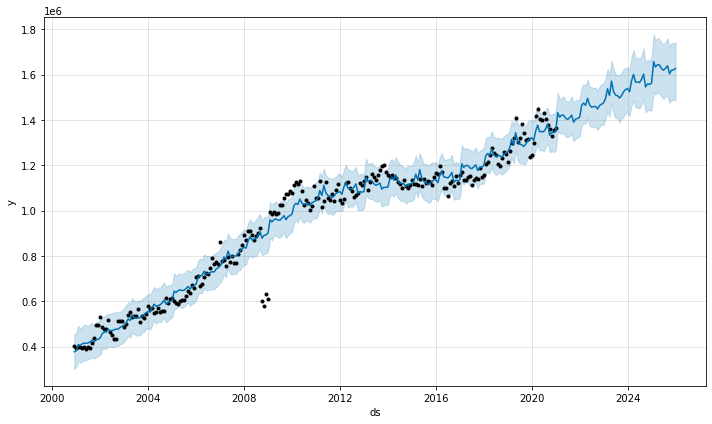

In [80]:
# plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe
fig1 = m.plot(forecast)

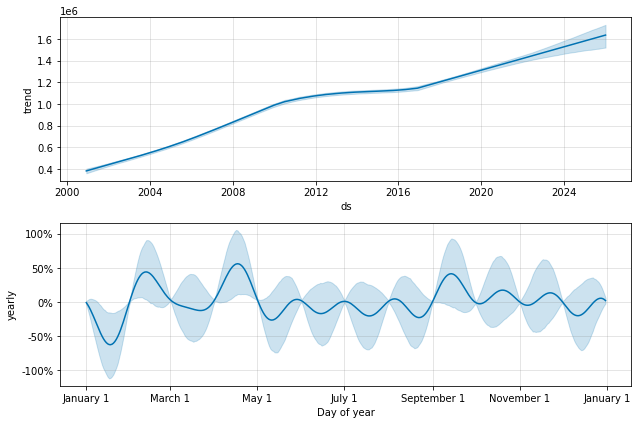

In [81]:
#If you want to see the forecast components, you can use the Prophet.plot_components method.
#By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series.
#If you include holidays, you’ll see those here, too.

fig2 = m.plot_components(forecast)


In [82]:
#An interactive figure of the forecast and components can be created with plotly. 
#You will need to install plotly 4.0 or above separately, as it will not by default be installed with fbprophet. 
#You will also need to install the notebook and ipywidgets packages.

from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [83]:
plot_components_plotly(m, forecast)